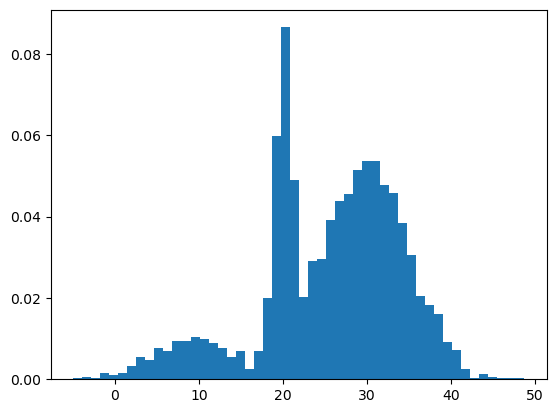

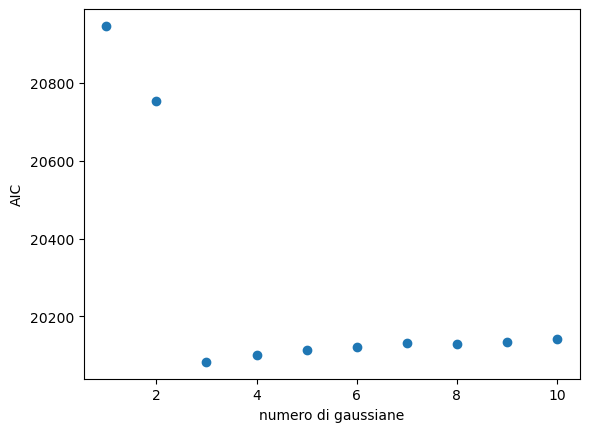

modello migliore è dato da 3 gaussiane


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data=np.load("C:/Users/leoni/Desktop/astrostatistics_bicocca_2024/solutions/formationchannels.npy")

plt.hist(data, bins=50, density=True)
plt.show()

#guardando a occhio vedo 3 gaussiane

aics=[]
points=np.arange(1,11)
for p in points:
    gm = GaussianMixture(n_components=p, random_state=0).fit(data)  
    aics=np.append(aics, gm.aic(data))       

plt.scatter(points, aics)
plt.xlabel("numero di gaussiane")
plt.ylabel("AIC")
plt.show()

min=np.argsort(aics)
indicemin=min[0]

print("modello migliore è dato da",points[indicemin], "gaussiane")

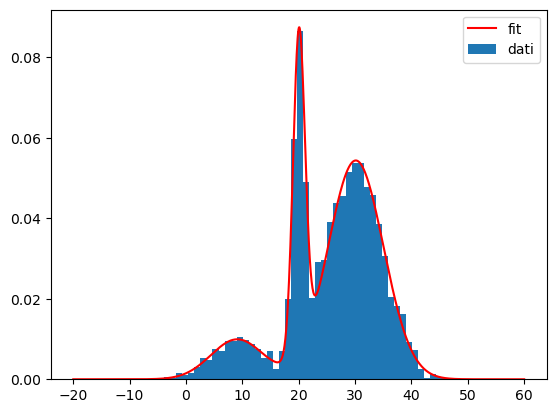

In [2]:
gm3=GaussianMixture(n_components=3, random_state=0)
gm3.fit(data)

xgrid=np.linspace(-20, 60, 1000).reshape(-1,1)
plt.plot(xgrid, np.exp(gm3.score_samples(xgrid)), color='red', label="fit")
plt.hist(data, bins=50, density=True, label="dati")
plt.legend()
plt.show()

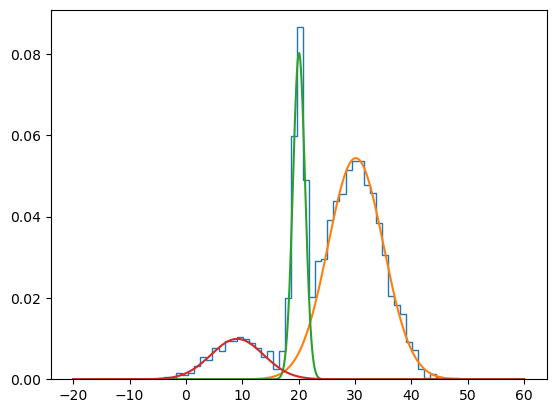

In [3]:
prob=gm3.predict_proba(xgrid)
pdf=np.exp(gm3.score_samples(xgrid))

pdf_singole=prob*pdf[:, np.newaxis]

plt.hist(data, bins=50, density=True, histtype='step')
plt.plot(xgrid, pdf_singole[:,0])
plt.plot(xgrid, pdf_singole[:,1])
plt.plot(xgrid, pdf_singole[:,2])

plt.show()